## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [1]:
import pandas as pd
import numpy as np

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [2]:
data = pd.read_csv('solarpower.csv')
data

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [3]:
for idx, val in enumerate(data['cum_power']):
    if val == -1:
        data['cum_power'][idx] = (data['cum_power'][idx-1] + data['cum_power'][idx+1]) / 2

<ipython-input-3-2be1ab3955d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cum_power'][idx] = (data['cum_power'][idx-1] + data['cum_power'][idx+1]) / 2


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [4]:
data['day_power'] = ''
data['day_power'][0] = 0
data['day_power'][1:] = np.diff(data['cum_power'])

data

<ipython-input-4-b149c03b169d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_power'][0] = 0
<ipython-input-4-b149c03b169d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_power'][1:] = np.diff(data['cum_power'])
G:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,date,cum_power,day_power
0,2017-01-01,20111.0,0
1,2017-01-02,20112.0,1
2,2017-01-03,20115.0,3
3,2017-01-04,20117.0,2
4,2017-01-05,20119.0,2
...,...,...,...
659,2018-10-22,28101.0,6
660,2018-10-23,28109.0,8
661,2018-10-24,28115.0,6
662,2018-10-25,28117.0,2


In [5]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.to_period('M')

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

<AxesSubplot:title={'center':'Ежемесячная выработка солнечной энергии'}, xlabel='Месяц', ylabel='Суммарное количество энергии'>

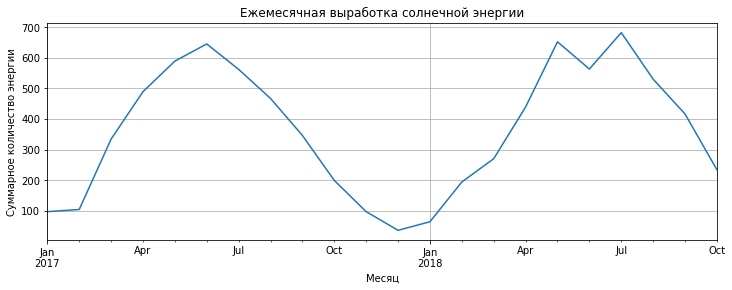

In [6]:
df = data.groupby('date')['day_power'].sum()
df.plot(kind='line', 
        figsize=(12, 4), 
        title='Ежемесячная выработка солнечной энергии', 
        grid = True, 
        xlabel='Месяц', 
        ylabel='Суммарное количество энергии')

- Как видно по графику, наибольшие значения вырабатываемой энергии соответствуют летним месяцам, т.к. солнечных дней гораздо больше. Зимой - соответвественно гораздо меньше.
- При это если сравнивать летние месяца в 2017 и 2018г., то 2018 выдался чуть более продуктивным с точки зрения выработки солнечной энергии.